#  Part 1: Creating the Dataframe

First, we install and import the tools necessary for webscraping and making our table.

In [1]:
!pip install bs4
#!pip install requests

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=241a5fc01d83ede2449746689dd64849a6b11bf334f4dd9918213f0184c29e97
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4


In [2]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

import pandas as pd

We get the necessary website and turn it into a beautiful soup!

In [3]:
#The below url contains the table of postal codes of Canada.
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text

soup = BeautifulSoup(data,"html5lib")

We use the hint-code to create a dataframe of the postcode information.

In [4]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned': #ignoring anything that's not assigned. Note that there are no 'not assigned' neighbourhoods as the assignment warned.
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

We find the size of the dataframe.

In [5]:
df.shape

(103, 3)

# Part 2: Latitude and Longitude

We use the provided .csv file to access the latitude and longtitude. We store it in the dataframe df2

In [6]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_64c4bdc5d2a34647972838b1722e2654 = 'https://s3.ap-geo.objectstorage.softlayer.net'
else:
    endpoint_64c4bdc5d2a34647972838b1722e2654 = 'https://s3.ap-geo.objectstorage.service.networklayer.com'

client_64c4bdc5d2a34647972838b1722e2654 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='5l7bG4PtST6ZEzVPgx6PPkI74YEt4YPtXgPX2Dd9nntt',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_64c4bdc5d2a34647972838b1722e2654)

body = client_64c4bdc5d2a34647972838b1722e2654.get_object(Bucket='capstoneproject-donotdelete-pr-ghngv1ve0dm4pt',Key='Geospatial_Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df2 = pd.read_csv(body)
df2.rename(columns = {'Postal Code' : 'PostalCode'}, inplace = True)
df2.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


We denote by df3 the required dataframe with the corresponding latitudes and longitudes.

In [7]:
df3 = pd.merge(df,df2).reset_index(drop=True)
df3.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


In [8]:
df3.groupby('Neighborhood').count()

,PostalCode,Borough,Latitude,Longitude
Neighborhood,,,,
Agincourt,1,1,1,1
"Alderwood, Long Branch",1,1,1,1
"Bathurst Manor, Wilson Heights, Downsview North",1,1,1,1
Bayview Village,1,1,1,1
"Bedford Park, Lawrence Manor East",1,1,1,1
...,...,...,...,...
"Willowdale, Newtonbrook",1,1,1,1
Woburn,1,1,1,1
Woodbine Heights,1,1,1,1


# Part 3: Explore and Cluster Toronto Neighbourhoods

We prepare a function for finding nearby venues of given places. We also collect the places which don't return any results in a list called 'no_results'

In [9]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
CLIENT_ID = ''
CLIENT_SECRET = ''
VERSION = '20180605'

def getNearbyVenues(names, latitudes, longitudes, radius=500):
  
    venues_list=[]
    no_results=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name,)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        if not results:
            no_results.append(name)
        else:
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(no_results,nearby_venues)

In [10]:
miss, toronto_venues = getNearbyVenues(names=df3['Neighborhood'],
                                   latitudes=df3['Latitude'],
                                   longitudes=df3['Longitude']
                                  )

We remove the places in df3 (our dataframe with the latitude and longitude) which did not return results in the nearby-venues function. This is so that later when we merge df3 with the toronto_merged, the cluster_labels column remains as integers (otherwise it becomes floats due to the incompatible number of columns in both dataframes). We check the size of the updated dataframe df3.

In [11]:
for places in miss:
    indexNames = (df3[(df3['Neighborhood'] == places)].index)
    df3.drop(indexNames, inplace=True)

df3.shape

(99, 5)

We name every venue found by the nearby-venues function and place all this information in the dataframe toronto_venues. Then for a purely numerical data, we list in toronto_group the number of venues for each given neighbourhood. Lastly, we count up all the unique venues.

In [12]:
print(toronto_venues.shape)
toronto_venues.head()

(2126, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


In [13]:
toronto_group = toronto_venues.groupby('Neighborhood').count()
toronto_group.head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,5,5,5,5,5,5
"Alderwood, Long Branch",6,6,6,6,6,6
"Bathurst Manor, Wilson Heights, Downsview North",21,21,21,21,21,21
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",25,25,25,25,25,25


In [14]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 268 uniques categories.


Here we begin to lay out the one-to-one grid for every neighbourhood and every venue, given by toronto_grouped.

In [15]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

#renaming one of the venue columns 'Neighborhood' to 'Neighbouring areas' to avoid confusion with the existing 'Neighborhood' column in our dataframe
toronto_onehot.rename(columns = {'Neighborhood' : 'Neighbouring areas'}, inplace = True)

In [16]:
# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped[7:15]

,Neighborhood,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
7,"Brockton, Parkdale Village, Exhibition Place",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000
8,"CN Tower, King and Spadina, Railway Lands, Har...",0.0,0.000000,0.066667,0.066667,0.066667,0.133333,0.2,0.066667,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000
9,Caledonia-Fairbanks,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.25,0.000000
10,Cedarbrae,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000
11,Central Bay Street,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.015625,0.0,0.0,0.0,0.015625,0.0,0.0,0.00,0.015625
12,Christie,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000
13,Church and Wellesley,0.0,0.012987,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.012987,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.025974
14,"Clairville, Humberwood, Woodbine Downs, West H...",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000


Here we list the top five venues for every neighbourhood.

In [18]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0             Breakfast Spot   0.2
1                     Lounge   0.2
2               Skating Rink   0.2
3  Latin American Restaurant   0.2
4             Clothing Store   0.2


----Alderwood, Long Branch----
            venue  freq
0     Pizza Place  0.33
1             Gym  0.17
2  Sandwich Place  0.17
3     Coffee Shop  0.17
4             Pub  0.17


----Bathurst Manor, Wilson Heights, Downsview North----
                       venue  freq
0                       Bank  0.10
1                Coffee Shop  0.10
2                Gas Station  0.05
3                  Gift Shop  0.05
4  Middle Eastern Restaurant  0.05


----Bayview Village----
                 venue  freq
0  Japanese Restaurant  0.25
1   Chinese Restaurant  0.25
2                 Bank  0.25
3                 Café  0.25
4          Music Venue  0.00


----Bedford Park, Lawrence Manor East----
                  venue  freq
0            Restaurant  0.08
1           Coffee Shop

Now we want to return the top ten venues in every neighbourhood and return it in a big table.

In [19]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [20]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Lounge,Skating Rink,Latin American Restaurant,Breakfast Spot,Clothing Store,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore
1,"Alderwood, Long Branch",Pizza Place,Gym,Pub,Sandwich Place,Coffee Shop,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Shopping Mall,Supermarket,Restaurant,Sushi Restaurant,Deli / Bodega,Middle Eastern Restaurant,Ice Cream Shop,Diner
3,Bayview Village,Café,Japanese Restaurant,Chinese Restaurant,Bank,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Yoga Studio
4,"Bedford Park, Lawrence Manor East",Italian Restaurant,Sandwich Place,Restaurant,Coffee Shop,Liquor Store,Thai Restaurant,Indian Restaurant,Pub,Sushi Restaurant,Butcher
...,...,...,...,...,...,...,...,...,...,...,...
94,Willowdale South,Ramen Restaurant,Coffee Shop,Bubble Tea Shop,Café,Pizza Place,Restaurant,Bank,Ice Cream Shop,Discount Store,Japanese Restaurant
95,Willowdale West,Pharmacy,Grocery Store,Discount Store,Coffee Shop,Pizza Place,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant
96,Woburn,Coffee Shop,Korean BBQ Restaurant,Yoga Studio,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
97,Woodbine Heights,Skating Rink,Park,Spa,Beer Store,Athletics & Sports,Curling Ice,Yoga Studio,Dumpling Restaurant,Dog Run,Doner Restaurant


And now it's cluster time! We use the following elbow-method to find the best value of k.

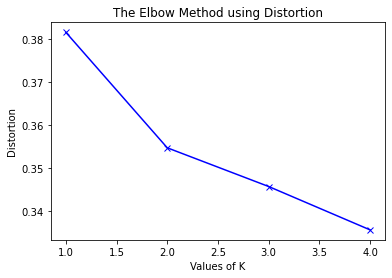

In [21]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 5)
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
X = toronto_grouped_clustering

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Since there is an elbow(ish) at k=2, we set our cluster to it.

In [22]:
# set number of clusters
kclusters = 2

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int32)

We create our comprehensive dataframe toronto_merged which has all the details from above.

In [23]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Agincourt,Lounge,Skating Rink,Latin American Restaurant,Breakfast Spot,Clothing Store,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore
1,1,"Alderwood, Long Branch",Pizza Place,Gym,Pub,Sandwich Place,Coffee Shop,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
2,1,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Shopping Mall,Supermarket,Restaurant,Sushi Restaurant,Deli / Bodega,Middle Eastern Restaurant,Ice Cream Shop,Diner
3,1,Bayview Village,Café,Japanese Restaurant,Chinese Restaurant,Bank,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Yoga Studio
4,1,"Bedford Park, Lawrence Manor East",Italian Restaurant,Sandwich Place,Restaurant,Coffee Shop,Liquor Store,Thai Restaurant,Indian Restaurant,Pub,Sushi Restaurant,Butcher


In [24]:
toronto_merged = df3 # merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,0,Food & Drink Shop,Park,Eastern European Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Yoga Studio
1,M4A,North York,Victoria Village,43.725882,-79.315572,1,Coffee Shop,Portuguese Restaurant,Hockey Arena,Intersection,Ethiopian Restaurant,Escape Room,Electronics Store,Event Space,Falafel Restaurant,Diner
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,Coffee Shop,Park,Café,Pub,Bakery,Theater,Breakfast Spot,Chocolate Shop,Beer Store,Shoe Store
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,1,Clothing Store,Accessories Store,Boutique,Furniture / Home Store,Miscellaneous Shop,Coffee Shop,Women's Store,Vietnamese Restaurant,Filipino Restaurant,Field
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,1,Coffee Shop,College Cafeteria,Sushi Restaurant,College Auditorium,Bar,Beer Bar,Smoothie Shop,Sculpture Garden,Sandwich Place,Burrito Place
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944,0,Park,River,Pool,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,1,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Restaurant,Gay Bar,Yoga Studio,Mediterranean Restaurant,Pub,Hotel,Fast Food Restaurant
100,M7Y,East Toronto Business,Enclave of M4L,43.662744,-79.321558,1,Light Rail Station,Comic Shop,Garden Center,Brewery,Farmers Market,Spa,Fast Food Restaurant,Burrito Place,Butcher,Restaurant
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509,0,Park,Baseball Field,Yoga Studio,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store


Now we want to plot our cluster points on the map and see what places of interest come up.

In [25]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 94 kB 3.8 MB/s  eta 0:00:01


In [26]:
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [27]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [28]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Let us try to analyse the clusters now. The first cluster below shows that the red-points (above) indicate neighbourhoods with lots of eateries. The second cluster below shows that the blue-points (above) indicate neighbourhoods with lots of parks.

In [29]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,0,Food & Drink Shop,Park,Eastern European Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Yoga Studio
16,York,0,Field,Park,Hockey Arena,Trail,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
21,York,0,Park,Women's Store,Pool,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore
35,East York/East Toronto,0,Park,Convenience Store,Coffee Shop,Yoga Studio,Dumpling Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore
40,North York,0,Park,Airport,Yoga Studio,Eastern European Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
49,North York,0,Park,Bakery,Construction & Landscaping,Basketball Court,Yoga Studio,Eastern European Restaurant,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
61,Central Toronto,0,Park,Bus Line,Swim School,Drugstore,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Fast Food Restaurant
64,York,0,Park,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant
66,North York,0,Park,Convenience Store,Yoga Studio,Dumpling Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Electronics Store
68,Central Toronto,0,Park,Sushi Restaurant,Jewelry Store,Trail,Diner,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore


In [30]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,North York,1,Coffee Shop,Portuguese Restaurant,Hockey Arena,Intersection,Ethiopian Restaurant,Escape Room,Electronics Store,Event Space,Falafel Restaurant,Diner
2,Downtown Toronto,1,Coffee Shop,Park,Café,Pub,Bakery,Theater,Breakfast Spot,Chocolate Shop,Beer Store,Shoe Store
3,North York,1,Clothing Store,Accessories Store,Boutique,Furniture / Home Store,Miscellaneous Shop,Coffee Shop,Women's Store,Vietnamese Restaurant,Filipino Restaurant,Field
4,Queen's Park,1,Coffee Shop,College Cafeteria,Sushi Restaurant,College Auditorium,Bar,Beer Bar,Smoothie Shop,Sculpture Garden,Sandwich Place,Burrito Place
6,Scarborough,1,Fast Food Restaurant,Diner,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...
96,Downtown Toronto,1,Coffee Shop,Restaurant,Pizza Place,Café,Italian Restaurant,Bakery,Pub,Chinese Restaurant,Convenience Store,Park
97,Downtown Toronto,1,Coffee Shop,Café,Hotel,Gym,Japanese Restaurant,Restaurant,American Restaurant,Seafood Restaurant,Asian Restaurant,Salad Place
99,Downtown Toronto,1,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Restaurant,Gay Bar,Yoga Studio,Mediterranean Restaurant,Pub,Hotel,Fast Food Restaurant
100,East Toronto Business,1,Light Rail Station,Comic Shop,Garden Center,Brewery,Farmers Market,Spa,Fast Food Restaurant,Burrito Place,Butcher,Restaurant
